In [6]:
# import sys
# sys.path.append('..')
import datetime as dt

import matplotlib
import matplotlib.pyplot as plt

from util.conferences import *

In [12]:
# import os
os.getcwd()

'C:\\Users\\deejay\\Personal Files [Local]\\Applied Data Science\\Data Mining - Text, Images, Video\\Group Project Data Mining\\src'

In [11]:
#correct_cwd()

from util.infections import get_infection_data


In [14]:
rutte_data, de_jonge_data = get_number_of_sentences_in_conference(
    get_conference_data(include_journalist_questions=False))
rutte_texts = [content['text'] for content in rutte_data]
de_jonge_texts = [content['text'] for content in de_jonge_data]
date_strings = [content['date'] for content in rutte_data]
n_rutte_sentences = [content['number_of_sentences'] for content in rutte_data]
dates = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in date_strings]

In [15]:
print(len(rutte_texts))

60


In [16]:
infections = get_infection_data()
infections['new_infection_ma'] = infections['new_infections'].rolling(window=7, min_periods=1).mean()
infections['new_ic_admissions_ma'] = infections['new_ic_admissions'].rolling(window=7, min_periods=1).mean()

sentence_lengths = pd.DataFrame()
sentence_lengths['sentence_length'] = [get_average_sentence_length(text) for text in rutte_texts]
sentence_lengths['sentence_length_ma'] = sentence_lengths['sentence_length'].rolling(window=5, min_periods=1).mean()

sentence_lengths['number_of_words'] = [get_number_of_words(text) for text in rutte_texts]
sentence_lengths['number_of_words_ma'] = sentence_lengths['number_of_words'].rolling(window=5, min_periods=1).mean()

In [27]:
sentence_lengths['number_of_words'].mean()
# 110 # 3641

1774.45

In [79]:
# from https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/two_scales.html
def two_lines(t1, data1, t2, data2, y_label1, ylabel2):
    fig, ax1 = plt.subplots()
    plt.xticks(rotation=45)

    color = 'tab:red'
    ax1.set_xlabel('date')
    ax1.set_ylabel(y_label1, color=color)
    ax1.plot(t1, data1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(ylabel2, color=color)  # we already handled the x-label with ax1
    ax2.plot(t2, data2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-l
    matplotlib.rcParams['figure.dpi'] = 300
    plt.savefig(f'output/sentence_length/{y_label1}-{ylabel2}.png')
    plt.show()

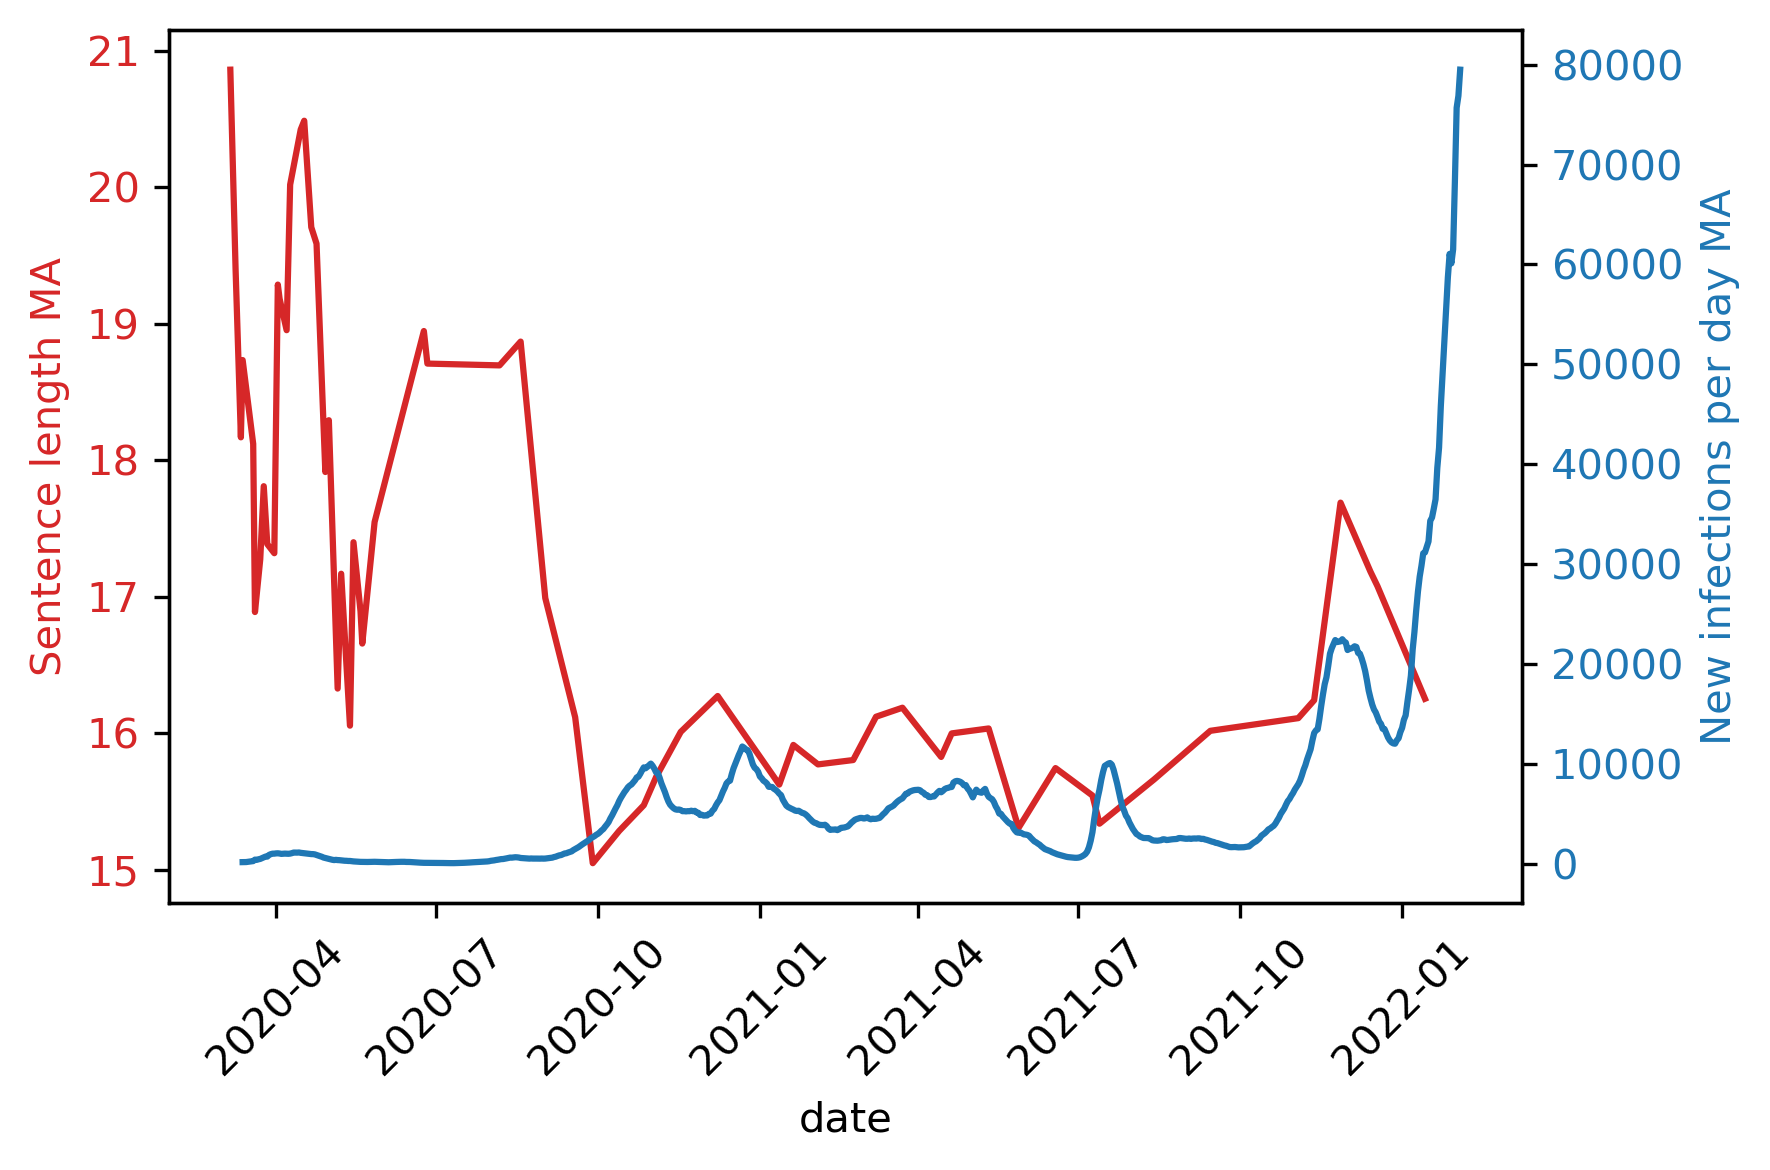

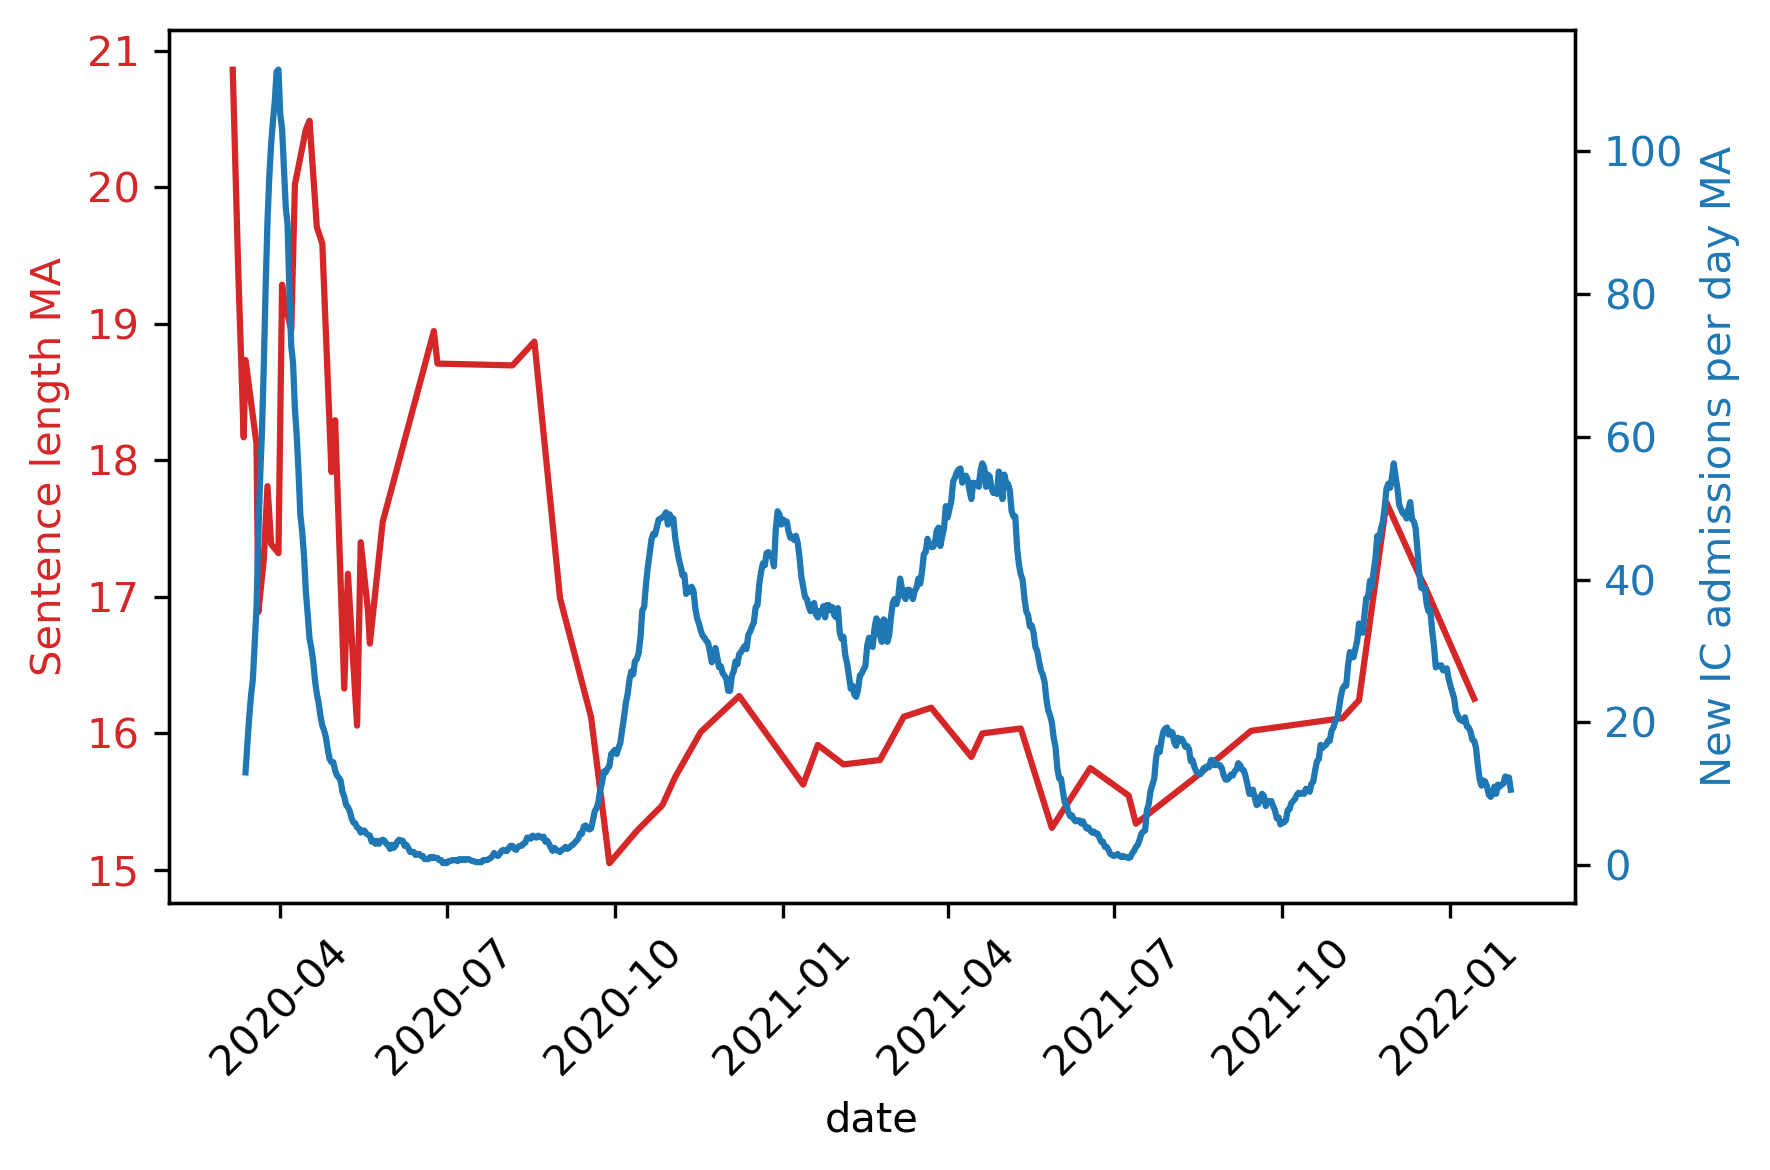

In [80]:
x = dates
y = sentence_lengths['sentence_length_ma']

x2 = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in infections.date]
two_lines(x, y, x2, infections.new_infection_ma, 'Sentence length MA', 'New infections per day MA')
two_lines(x, y, x2, infections.new_ic_admissions_ma, 'Sentence length MA', 'New IC admissions per day MA')

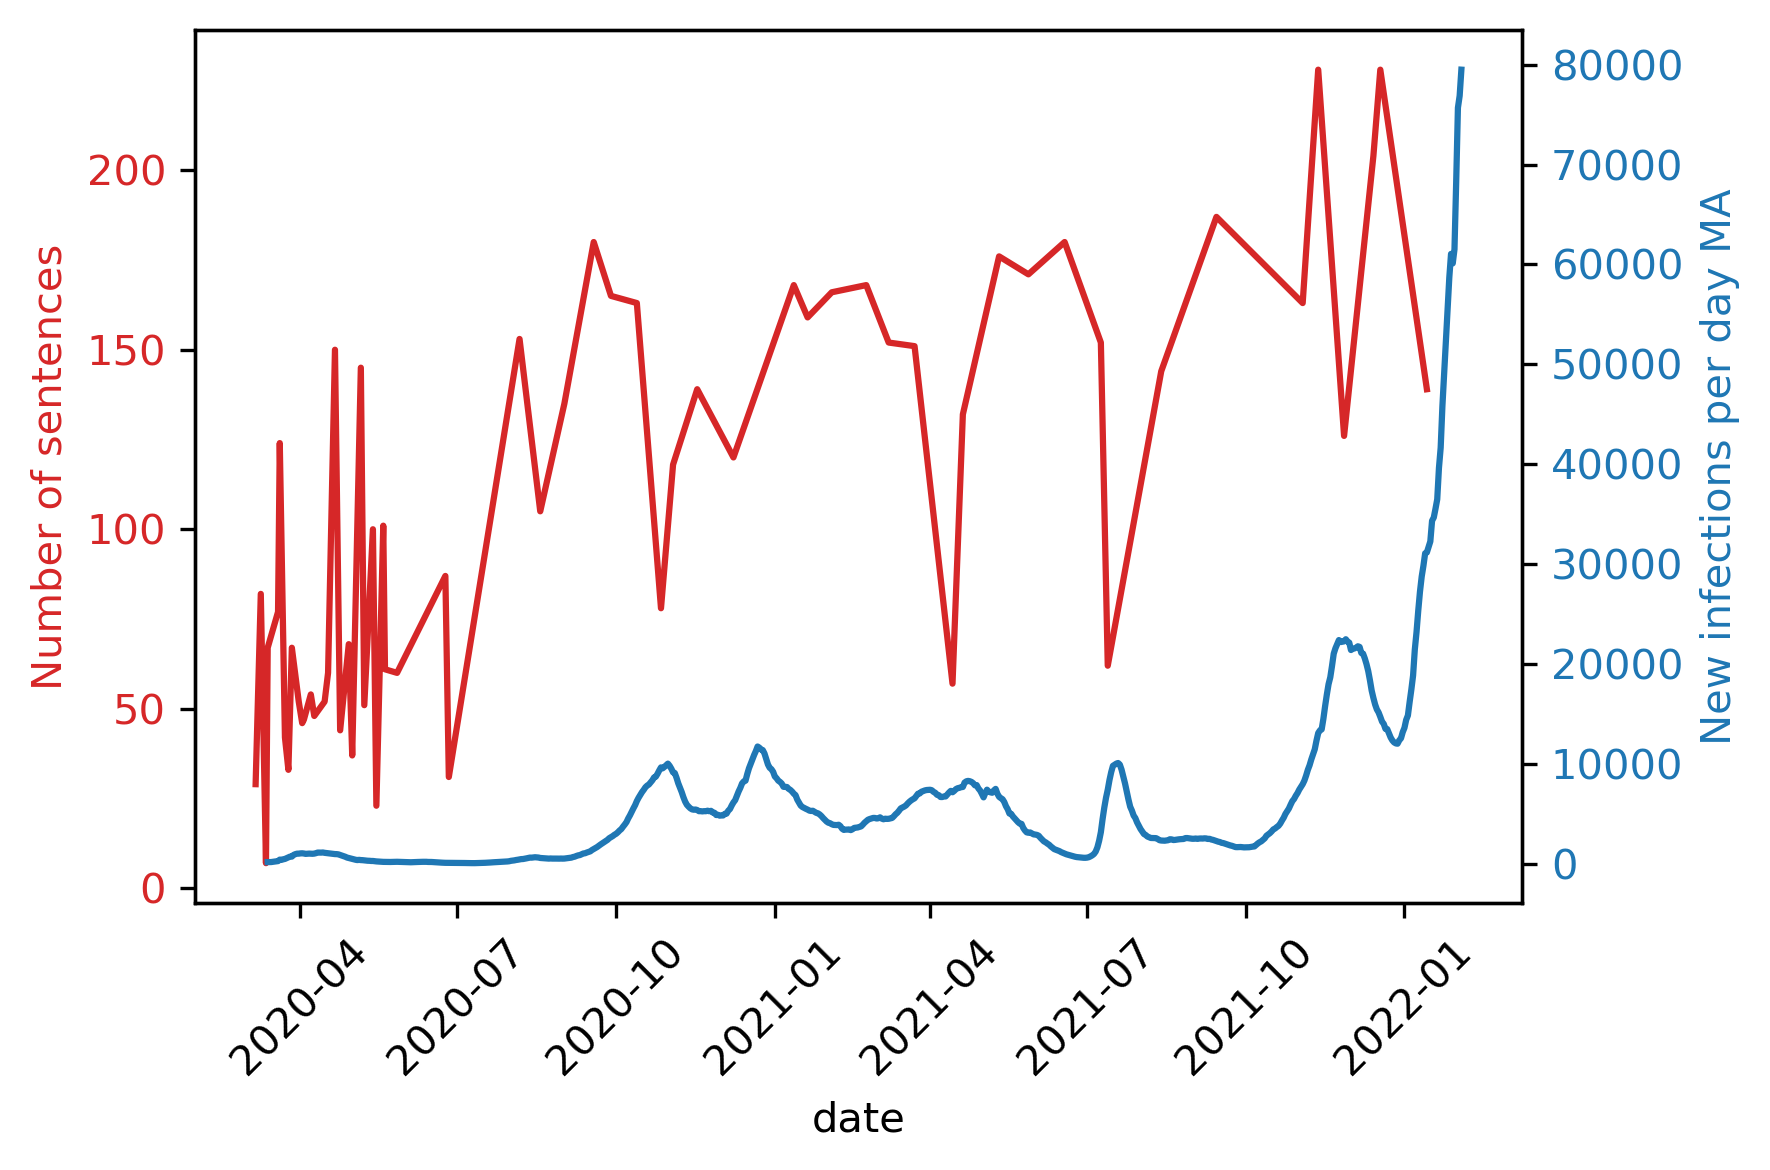

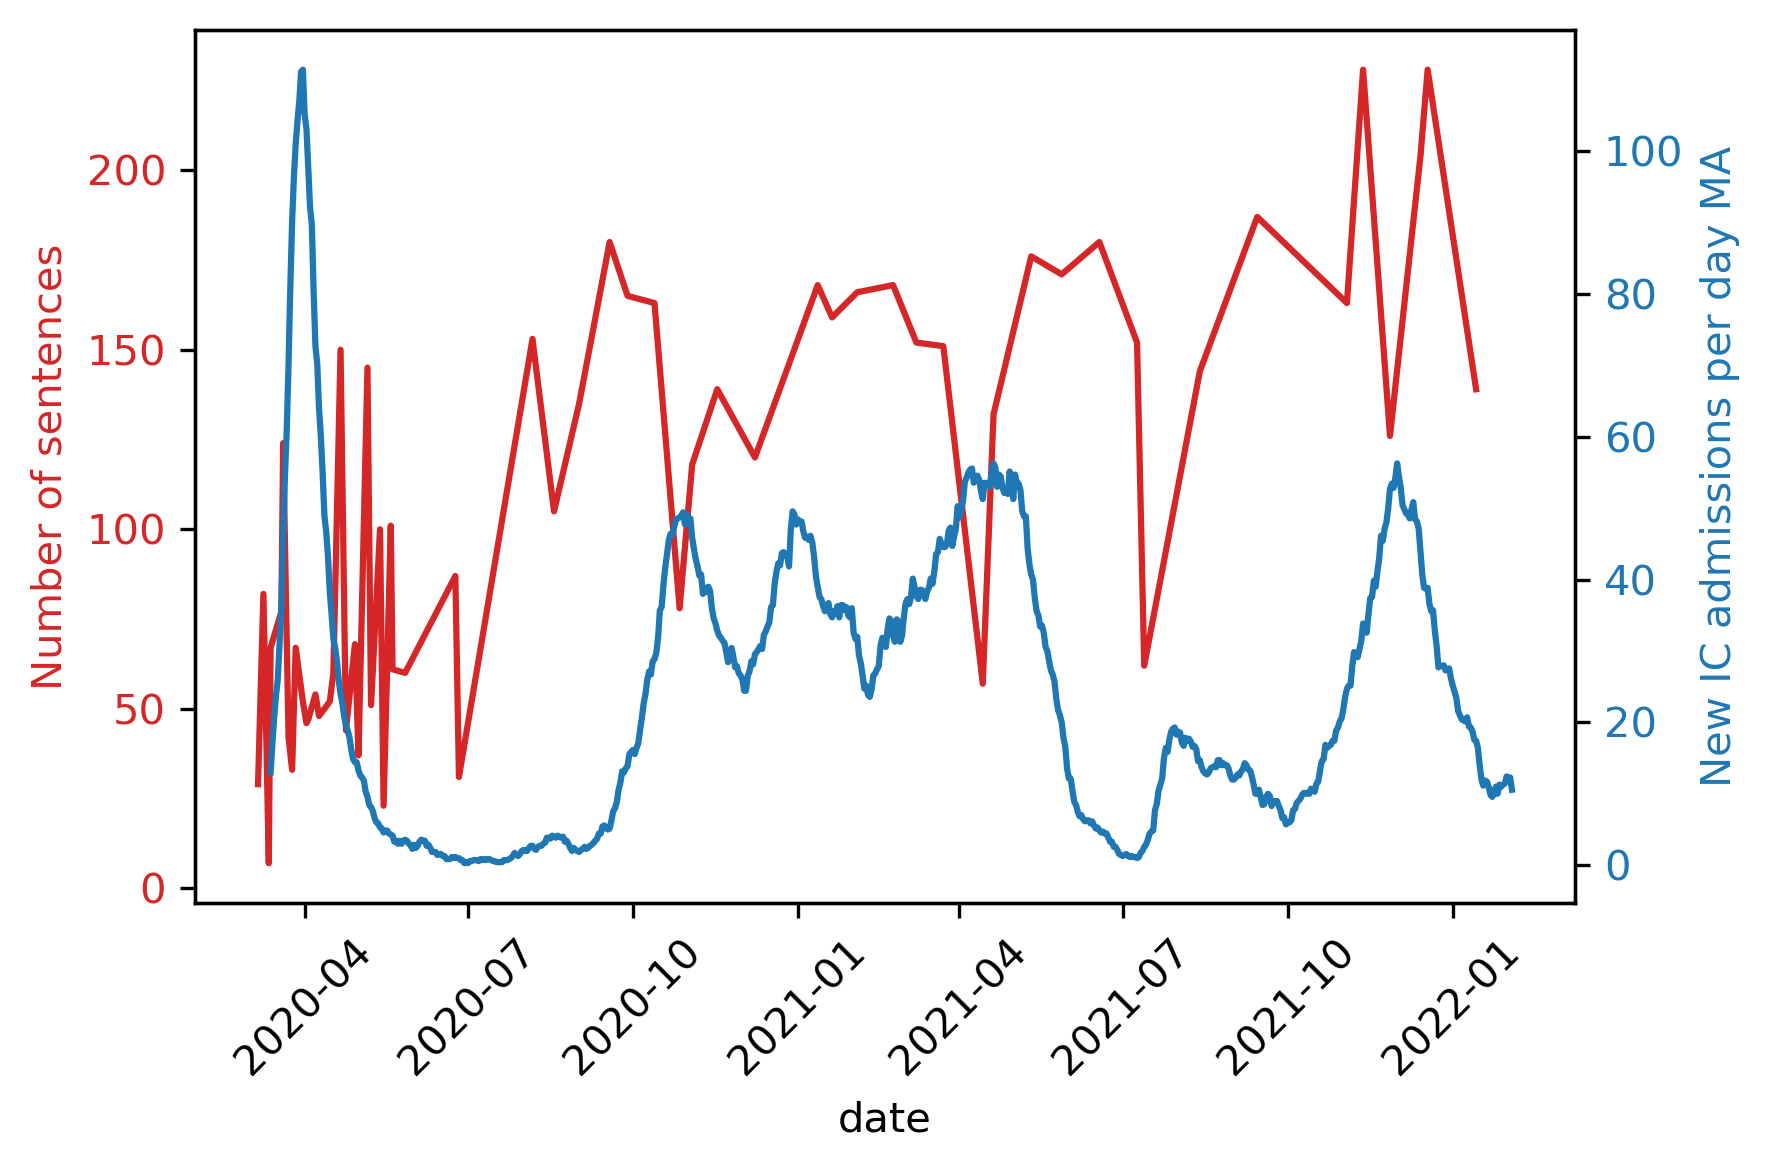

In [81]:
x = dates
y = n_rutte_sentences

x2 = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in infections.date]

two_lines(x, y, x2, infections.new_infection_ma, 'Number of sentences', 'New infections per day MA')
two_lines(x, y, x2, infections.new_ic_admissions_ma, 'Number of sentences', 'New IC admissions per day MA')

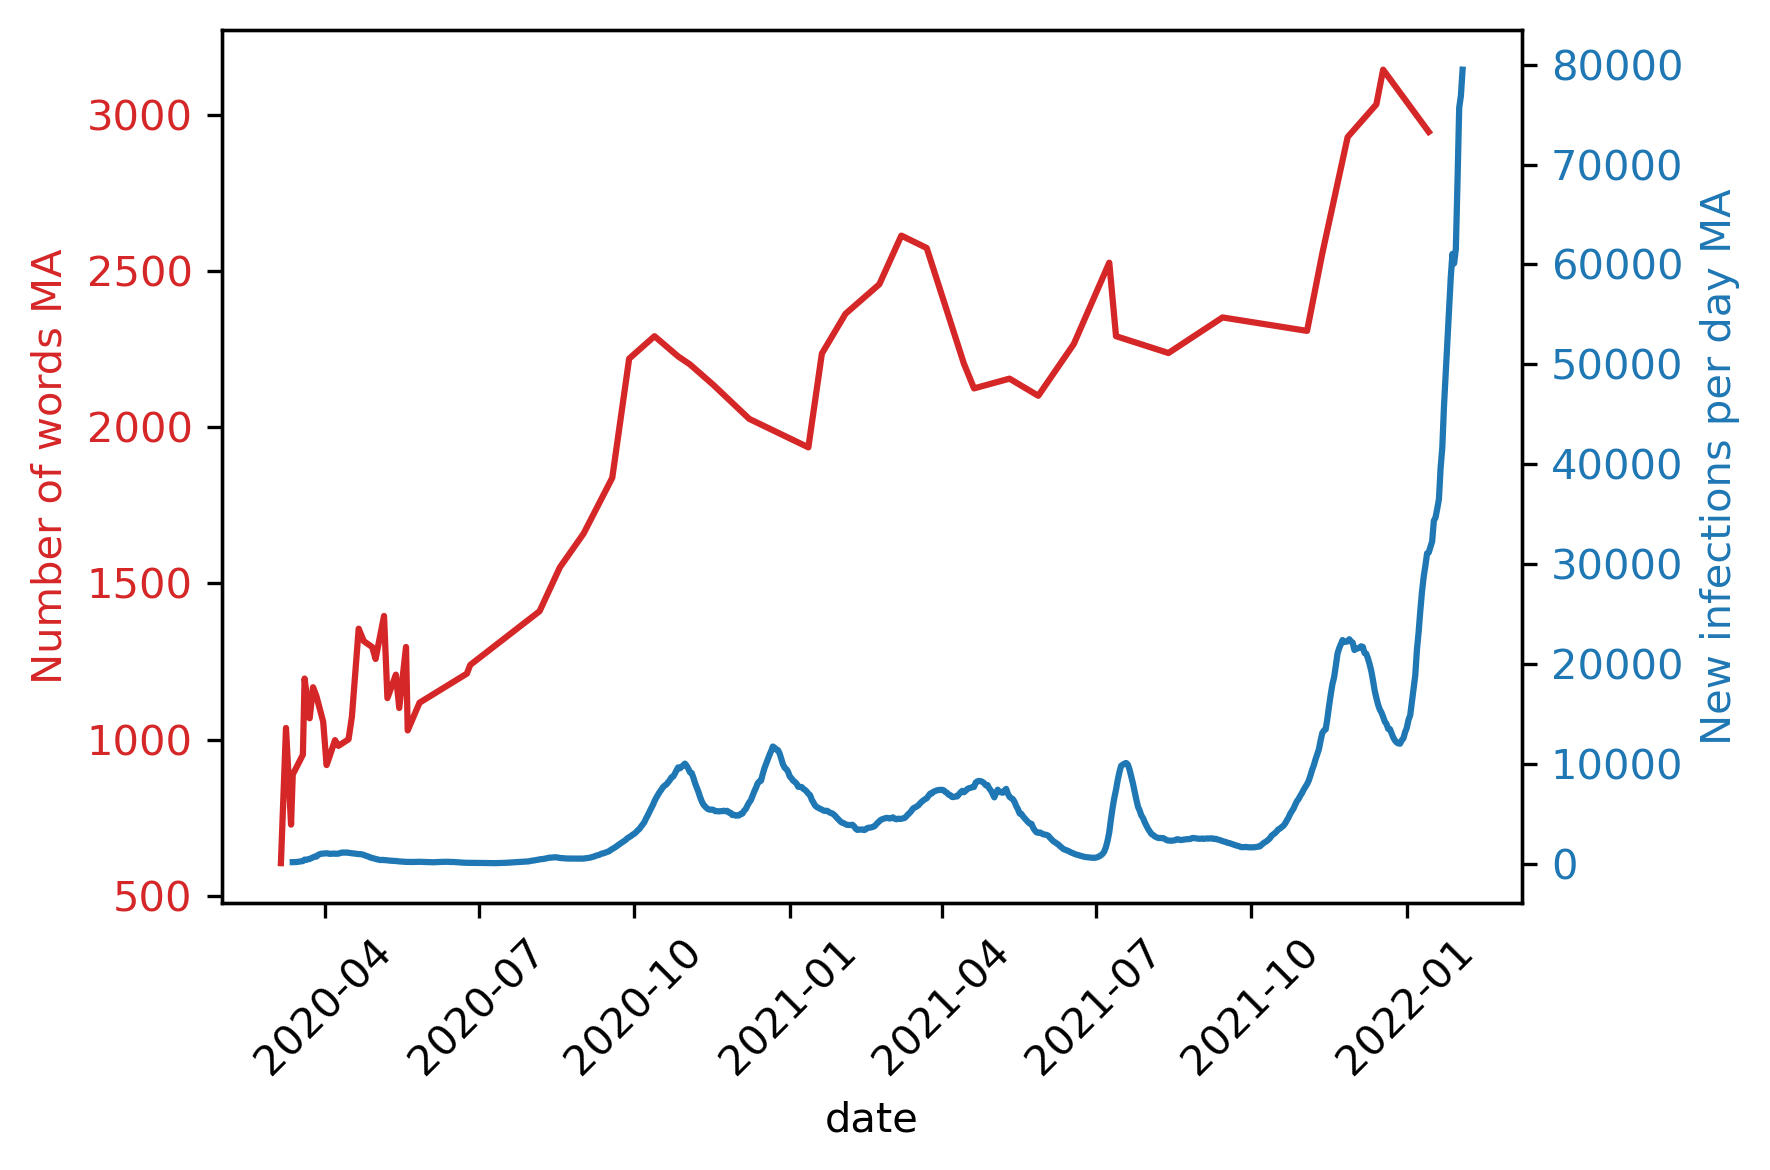

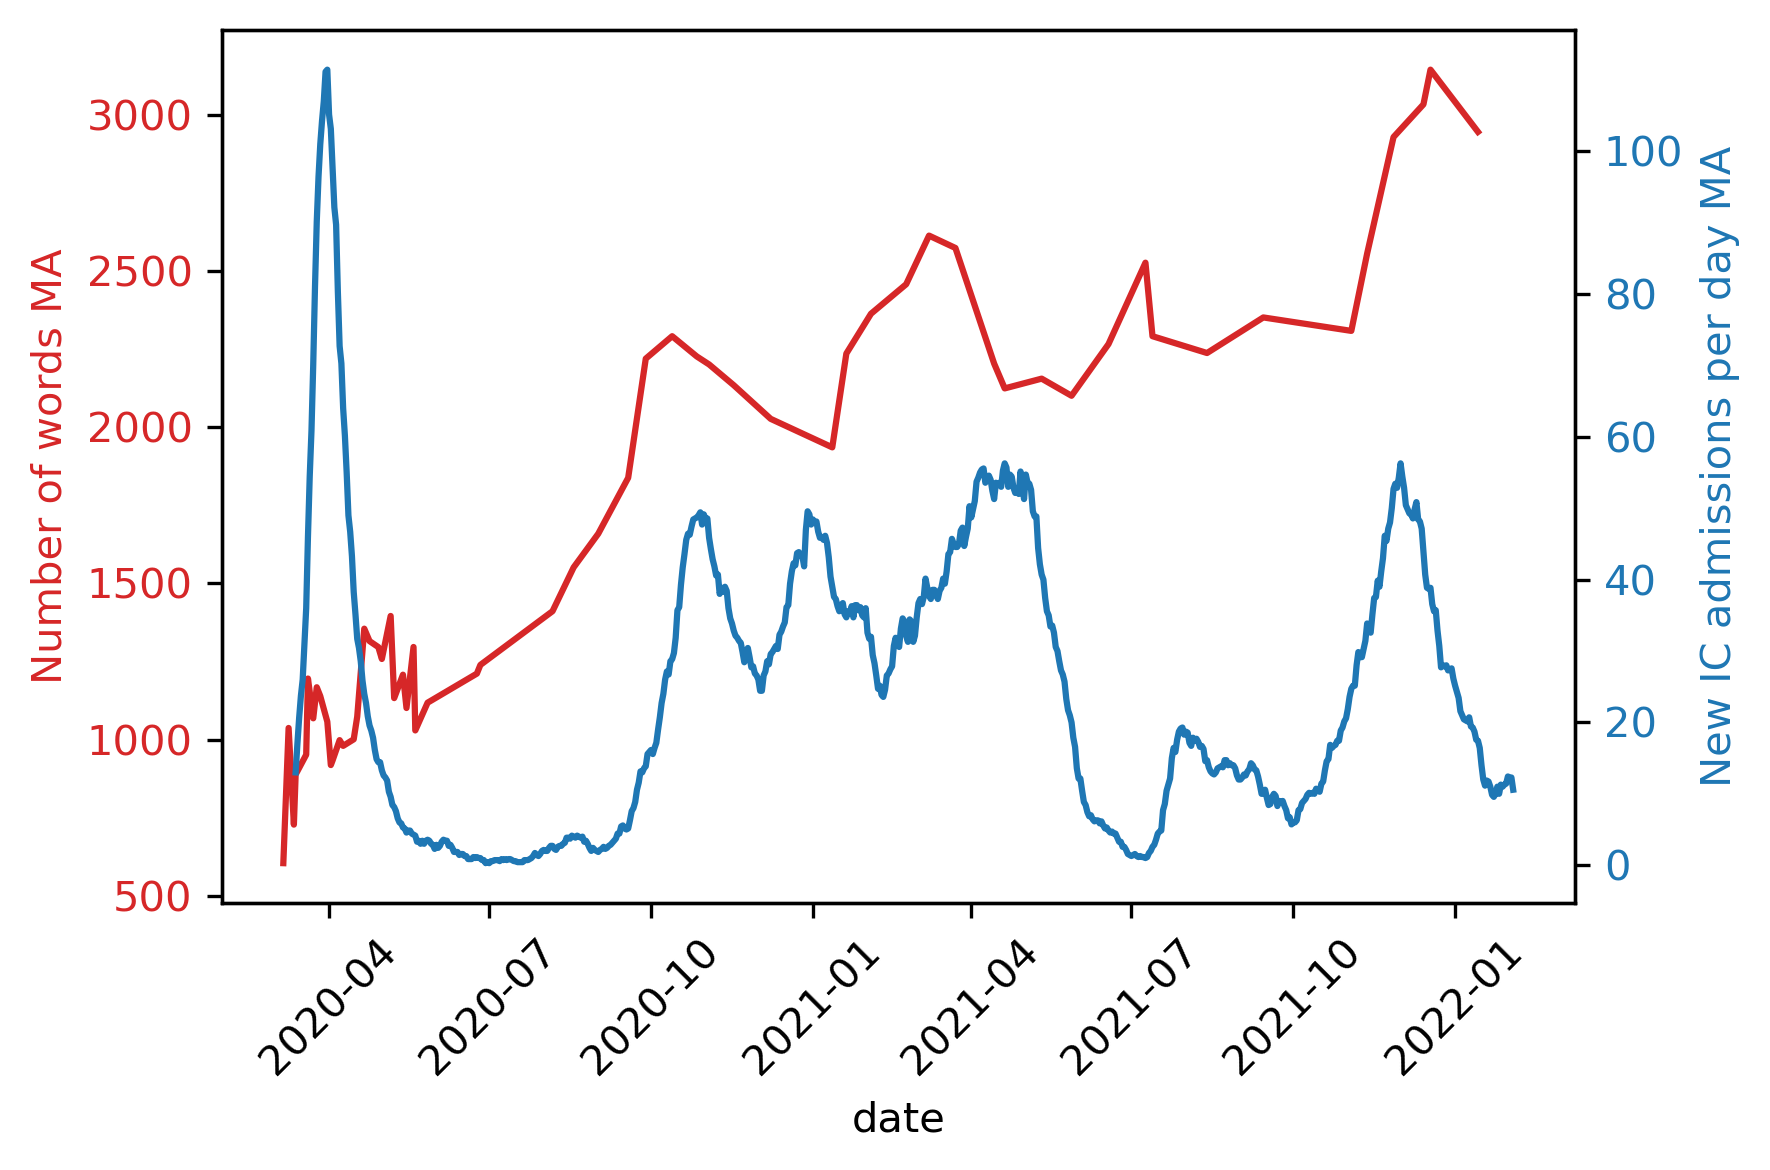

In [82]:
x = dates
y = sentence_lengths['number_of_words_ma']

x2 = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in infections.date]

two_lines(x, y, x2, infections.new_infection_ma, 'Number of words MA', 'New infections per day MA')
two_lines(x, y, x2, infections.new_ic_admissions_ma, 'Number of words MA', 'New IC admissions per day MA')


In [83]:
infections.head(50)

,date,total_infections,new_ic_admissions,new_infections,new_infection_ma,new_ic_admissions_ma
0,2020-03-13,804,13,155,155.000000,13.000000
1,2020-03-14,959,21,155,155.000000,17.000000
2,2020-03-15,1135,28,176,162.000000,20.666667
3,2020-03-16,1413,33,278,191.000000,23.750000
4,2020-03-17,1705,35,292,211.200000,26.000000
5,2020-03-18,2051,56,346,233.666667,31.000000
6,2020-03-19,2460,66,409,258.714286,36.000000
7,2020-03-20,3651,83,1191,406.714286,46.000000
8,2020-03-21,3631,80,-20,381.714286,54.428571
9,2020-03-22,4204,73,573,438.428571,60.857143
